In [1]:
import pandas as pd
import tqdm
import numpy as np
import seaborn as sns
import pylab as plt
import pytz

### The model

In [7]:
def model(tau:float, df:pd.DataFrame, T_in_at_start:float) -> pd.Series:
    """Note: assumes tau in hours.
       Please make sure that the data has a small time interval, otherwise inaccuracies will occur."""

    # Convert tau from hours to seconds
    tau = tau * 3600

    # Calculate the time difference in seconds (assumes constant interval)
    times = df.index
    timediff = (times[1] - times[0]).seconds

    # Initial temperature gets copied in for the first record
    T = [T_in_at_start]

    # Then we loop over all other steps
    for timestamp in times[1:]:

        # Get the relevant data
        T_in = T[-1]
        T_out = df.loc[timestamp, 'T_out']

        # The equation that does all the work
        T_change = -(T_in - T_out) * timediff / tau

        # Save to array
        T.append(T_in + T_change)

    return pd.Series(data=T, index=times, name='T_in')

### Dummy dataset

In [8]:
# Placeholder
df = pd.DataFrame()

In [9]:
# Create a dataframe with times between 10pm and 6am
df['time'] = pd.date_range("2022-02-21 22:00", "2022-02-22 04:00", freq="5 s", tz=pytz.timezone('Europe/Amsterdam'))
df.set_index('time', inplace=True)

In [10]:
# Set outside temperature
df['T_out'] = 0

### Example predictions

In [11]:
T_1 = model(1, df, 20)
T_3 = model(3, df, 20)
T_10 = model(10, df, 20)

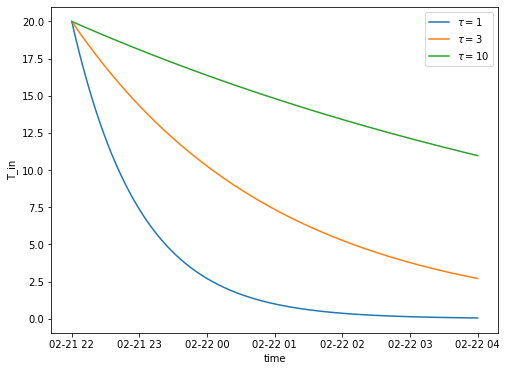

In [12]:
_ = plt.figure(figsize=(8,6))
_ = sns.lineplot(x=df.index, y=T_1, label="$\\tau=1$")
_ = sns.lineplot(x=df.index, y=T_3, label="$\\tau=3$")
_ = sns.lineplot(x=df.index, y=T_10, label="$\\tau=10$")
plt.savefig("Temperature decline.svg")

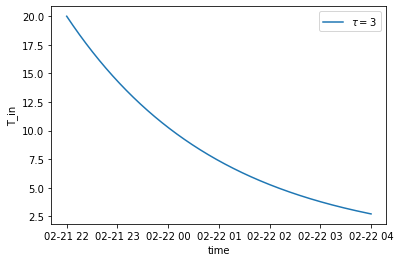

In [17]:
_ = plt.figure(figsize=(6,4))
_ = sns.lineplot(x=df.index, y=T_3, label="$\\tau=3$")
plt.savefig("Single.svg")

In [22]:
T_3.to_frame()

,T_in
time,
2022-02-21 22:00:00+01:00,20.000000
2022-02-21 22:00:05+01:00,19.990741
2022-02-21 22:00:10+01:00,19.981486
2022-02-21 22:00:15+01:00,19.972235
2022-02-21 22:00:20+01:00,19.962989
...,...
2022-02-22 03:59:40+01:00,2.710468
2022-02-22 03:59:45+01:00,2.709214
2022-02-22 03:59:50+01:00,2.707959


<AxesSubplot:xlabel='time'>

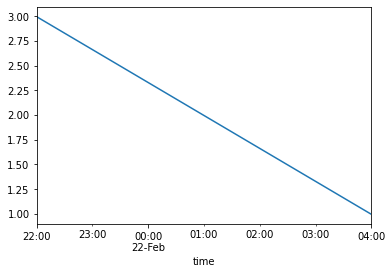

In [24]:
np.log(T_3).plot()